In [269]:
# Imports e instalações

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install scikit-learn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [270]:
# Carregando o DF

# df recebe o dataset
df = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_clima_v9.xlsx') #, sep=',')
df

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao_graus,vento_rajada_direcao,vento_rajada_velocidade,...,evento_enso,mes_sin,mes_cos,emissoes_co2,estacao_num,estacao,altitude,distancia_costa,ponto_orvalho_15h,depressao_orvalho_15h
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,315.0,NW,30,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,9.4,14.2
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,67.5,ENE,39,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,12.9,12.8
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,315.0,NW,85,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,14.0,6.2
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,315.0,NW,54,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.3,8.8
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,157.5,SSE,50,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.2,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,2017-06-25,Perth,4.9,16.8,0.0,1.6,7.9,90.0,E,39,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,5.0,11.2
50155,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,315.0,NW,35,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,4.6,8.8
50156,2017-06-25,Melbourne,5.5,13.9,0.0,2.8,3.8,337.5,NNW,44,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,3.8,8.4
50157,2017-06-25,Sydney,6.8,19.5,0.0,3.4,9.4,247.5,WSW,46,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,39,0,6.3,11.6


In [271]:
df.shape

(50159, 54)

In [272]:
df.columns.to_list()

['data',
 'localidade',
 'temp_min',
 'temp_max',
 'chuva_mm',
 'evaporacao',
 'horas_sol',
 'vento_rajada_direcao_graus',
 'vento_rajada_direcao',
 'vento_rajada_velocidade',
 'vento_direcao_9h_graus',
 'vento_direcao_9h',
 'vento_direcao_15h_graus',
 'vento_direcao_15h',
 'vento_veloc_9h',
 'vento_veloc_15h',
 'umidade_9h',
 'umidade_15h',
 'pressao_9h',
 'pressao_15h',
 'nuvem_9h',
 'nuvem_15h',
 'temp_9h',
 'temp_15h',
 'chove_amanha_vtr',
 'ano',
 'mes',
 'dia',
 'trimestre_quarter',
 'horas_sol_isna',
 'evaporacao_isna',
 'nuvem_9h_isna',
 'nuvem_15h_isna',
 'pressao_9h_isna',
 'pressao_15h_isna',
 'choveu_hoje',
 'amplitude_termica',
 'umidade_media',
 'variacao_pressao',
 'latitude',
 'longitude',
 'indice_total_enso',
 'anomalia_enso',
 'evento_enso_num',
 'evento_enso',
 'mes_sin',
 'mes_cos',
 'emissoes_co2',
 'estacao_num',
 'estacao',
 'altitude',
 'distancia_costa',
 'ponto_orvalho_15h',
 'depressao_orvalho_15h']

In [273]:
target_col = "chove_amanha_vtr"

In [ ]:
# mostrando distribuicao do target via percentual com normalize=true
print(df[target_col].value_counts(dropna=False))
print(df[target_col].value_counts(normalize=True, dropna=False))

chove_amanha_vtr
0    39438
1    10721
Name: count, dtype: int64
chove_amanha_vtr
0    0.78626
1    0.21374
Name: proportion, dtype: float64


In [ ]:
date_col = 'data'

# converte a coluna de data para datetime
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

In [276]:
# remove linhas onde a data não conseguiu ser convertida 
df = df.dropna(subset=[date_col]).copy()

In [ ]:
# ordena o dataset por data crescente 
df = df.sort_values(by=date_col).reset_index(drop=True)

In [ ]:
# confere rapidamente a menor e a maior data (sanidade)
print("Data mínima:", df[date_col].min())
print("Data máxima:", df[date_col].max())
print("Shape após tratamento da data:", df.shape)

Data mínima: 2007-11-01 00:00:00
Data máxima: 2017-06-25 00:00:00
Shape após tratamento da data: (50159, 54)


In [ ]:
# lista de possíveis colunas que vazam o alvo
possible_leak_cols = [
    "chuva_amanha_mm",
    "rain_tomorrow_mm",
    "target",
    "label"
]

# mantém somente as cols de vazamento que realmente existem no df
leak_cols = [c for c in possible_leak_cols if c in df.columns]

# mstra quais serão removidas
print(leak_cols)

# remove as colunas de vazamento do dataset
if len(leak_cols) > 0:
    df = df.drop(columns=leak_cols).copy()

[]


In [ ]:
# import motor
from sklearn.model_selection import train_test_split

# separação x e y
y = df[target_col].astype(int)
X = df.drop(columns=[target_col, date_col]).copy()

# split corrigido com stratify=df['localidade'] que garante que todas as cidades tenham representação proporcional no treino e no teste
print("Iniciando separação Estratificada por Localidade...")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    stratify=df['localidade'], # <--- O segredo para salvar Canberra
    random_state=42
)

# VALIDAÇÃO
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

# confere se Canberra agora aparece no teste
print("\nVerificando distribuição de Canberra:")
if 'localidade' in X_test.columns:
    count = X_test['localidade'].value_counts().get('Canberra', 0)
    print(f"{count} registros de Canberra no Teste.")
else:
    print("A coluna 'localidade' não está em X_test (foi removida antes?), mas o stratify funcionou usando o df original.")

Iniciando separação Estratificada por Localidade...
X_train: (40127, 52) y_train: (40127,)
X_test : (10032, 52) y_test : (10032,)

Verificando distribuição de Canberra:
218 registros de Canberra no Teste.


In [ ]:
# IDENTIFICAR COLUNAS NUMÉRICAS E CATEGÓRICAS
# Detecta colunas numéricas automaticamente
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()

# Detecta colunas categóricas automaticamente (texto/objeto/categoria)
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numéricas:", len(numeric_features), numeric_features[:10])
print("Categóricas:", len(categorical_features), categorical_features[:10])

Numéricas: 40 ['temp_min', 'temp_max', 'chuva_mm', 'evaporacao', 'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_velocidade', 'vento_direcao_9h_graus', 'vento_direcao_15h_graus', 'vento_veloc_9h']
Categóricas: 6 ['localidade', 'vento_rajada_direcao', 'vento_direcao_9h', 'vento_direcao_15h', 'evento_enso', 'estacao']


In [ ]:

# PIPELINE DE PREPROCESSAMENTO (NUM + CAT)
# pipeline para colunas numéricas imputer median preenche NaN com a mediana e scaler padroniza para ajudar modelos lineares
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# pipeline para colunas categóricas // imputer most_frequent preenche NaN com o valor mais comum e onehot transforma cidades em colunas 0/1 sendo uma por cidade
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# junta os dois pipelines em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)


In [ ]:

#  BASELINE 
baseline_model = LogisticRegression(max_iter=2000)

baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", baseline_model)
])

baseline_pipe.fit(X_train, y_train)

y_pred = baseline_pipe.predict(X_test)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))



Classification report:
              precision    recall  f1-score   support

           0     0.8875    0.9459    0.9158      7910
           1     0.7328    0.5533    0.6305      2122

    accuracy                         0.8628     10032
   macro avg     0.8102    0.7496    0.7731     10032
weighted avg     0.8548    0.8628    0.8554     10032

Matriz de confusão:
[[7482  428]
 [ 948 1174]]


In [284]:
#!pip install imblearn

In [ ]:

#  OVERSAMPLING COM SMOTE para treino
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(
    sampling_strategy=0.5,  # minoria vira 50% da maioria
    k_neighbors=5,
    random_state=42
)

model = LogisticRegression(max_iter=2000)

smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", model)
])

smote_pipe.fit(X_train, y_train)

y_pred_smote = smote_pipe.predict(X_test)

print("\nClassification report (SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=4))

print("Matriz de confusão (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))



Classification report (SMOTE):
              precision    recall  f1-score   support

           0     0.9145    0.8927    0.9035      7910
           1     0.6326    0.6890    0.6596      2122

    accuracy                         0.8496     10032
   macro avg     0.7736    0.7908    0.7815     10032
weighted avg     0.8549    0.8496    0.8519     10032

Matriz de confusão (SMOTE):
[[7061  849]
 [ 660 1462]]


In [286]:

# PROBABILIDADES DO MODELO COM SMOTE


# Probabilidade da classe 1 (chuva)
y_proba_smote = smote_pipe.predict_proba(X_test)[:, 1]

# Sanidade: ver algumas probabilidades
print("Exemplo de probabilidades:", y_proba_smote[:10])


Exemplo de probabilidades: [0.01679334 0.04899399 0.26384875 0.44020115 0.33195313 0.50758227
 0.22987766 0.58057451 0.01681425 0.05236729]


In [ ]:

# DEFINIÇÃO DA GRADE DE THRESHOLDS
# Grade de thresholds para teste
thresholds = np.arange(0.30, 0.71, 0.05)

print("Thresholds testados:", thresholds)


Thresholds testados: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]


In [ ]:

# verificação pelo threshold
results = []

for thr in thresholds:

    # converte probabilidade em classe usando o threshold
    y_pred_thr = (y_proba_smote >= thr).astype(int)

    # acurácia geral 
    accuracy = accuracy_score(y_test, y_pred_thr)

    # métricas focadas na classe 1
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    # matriz de confusão para extrair FP e FN
    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

In [ ]:

# results no df
df_thresholds = pd.DataFrame(results)

# Ordena por recall decrescente (chuva é prioridade)
df_thresholds_sorted = df_thresholds.sort_values(
    by="recall_chuva",
    ascending=False
)

display(df_thresholds_sorted)


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.798644,0.818096,0.515134,0.632192,386,1634
1,0.35,0.816089,0.788407,0.545129,0.644577,449,1396
2,0.40,0.830742,0.756833,0.576040,0.654175,516,1182
3,0.45,0.840211,0.722432,0.601885,0.656672,589,1014
4,0.50,0.849581,0.688973,0.632627,0.659598,660,849
5,0.55,0.854565,0.644204,0.660068,0.652039,755,704
6,0.60,0.859749,0.604618,0.693139,0.645860,839,568
7,0.65,0.863537,0.564562,0.729154,0.636388,924,445
8,0.70,0.861443,0.508483,0.756662,0.608230,1043,347


In [290]:

# XGBOOST - TREINO BASELINE


from xgboost import XGBClassifier

# calcula scale_pos_weight no TREINO
n_pos = (y_train == 1).sum()
n_neg = (y_train == 0).sum()
scale_pos_weight = n_neg / n_pos

print("scale_pos_weight:", scale_pos_weight)

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1 #,
    ,reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
)

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

# treino
xgb_pipe.fit(X_train, y_train)


scale_pos_weight: 3.6664728456797304


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [291]:

# PROBABILIDADES (XGBOOST)


y_proba_xgb = xgb_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probabilidades:", y_proba_xgb[:10])


Exemplo de probabilidades: [0.00198814 0.03797592 0.2179659  0.46749714 0.29790473 0.58660686
 0.24431379 0.8345815  0.02626486 0.04621477]


In [292]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.773724,0.904336,0.481435,0.628356,203,2067
1,0.35,0.795355,0.882187,0.509388,0.645851,250,1803
2,0.40,0.814195,0.860038,0.538031,0.661951,297,1567
3,0.45,0.826655,0.828935,0.561085,0.669203,363,1376
4,0.50,0.840012,0.802545,0.589477,0.679705,419,1186
5,0.55,0.850578,0.768143,0.618127,0.685018,492,1007
6,0.60,0.861344,0.737041,0.652482,0.692189,558,833
7,0.65,0.868122,0.699811,0.684017,0.691824,637,686
8,0.70,0.875000,0.653629,0.727702,0.688679,735,519


In [293]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP,
        "true_positives": TP,
        "true_negatives": TN
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.773724,0.904336,0.481435,0.628356,203,2067,1919,5843
1,0.35,0.795355,0.882187,0.509388,0.645851,250,1803,1872,6107
2,0.40,0.814195,0.860038,0.538031,0.661951,297,1567,1825,6343
3,0.45,0.826655,0.828935,0.561085,0.669203,363,1376,1759,6534
4,0.50,0.840012,0.802545,0.589477,0.679705,419,1186,1703,6724
5,0.55,0.850578,0.768143,0.618127,0.685018,492,1007,1630,6903
6,0.60,0.861344,0.737041,0.652482,0.692189,558,833,1564,7077
7,0.65,0.868122,0.699811,0.684017,0.691824,637,686,1485,7224
8,0.70,0.875000,0.653629,0.727702,0.688679,735,519,1387,7391


In [294]:

# MATRIZ FINAL - XGBOOST


best_thr_xgb = 0.50  

y_pred_xgb_final = (y_proba_xgb >= best_thr_xgb).astype(int)

print(f"\nClassification report (XGBoost, thr={best_thr_xgb}):")
print(classification_report(y_test, y_pred_xgb_final, digits=4))

print("Matriz de confusão (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb_final))



Classification report (XGBoost, thr=0.5):
              precision    recall  f1-score   support

           0     0.9413    0.8501    0.8934      7910
           1     0.5895    0.8025    0.6797      2122

    accuracy                         0.8400     10032
   macro avg     0.7654    0.8263    0.7865     10032
weighted avg     0.8669    0.8400    0.8482     10032

Matriz de confusão (XGBoost):
[[6724 1186]
 [ 419 1703]]


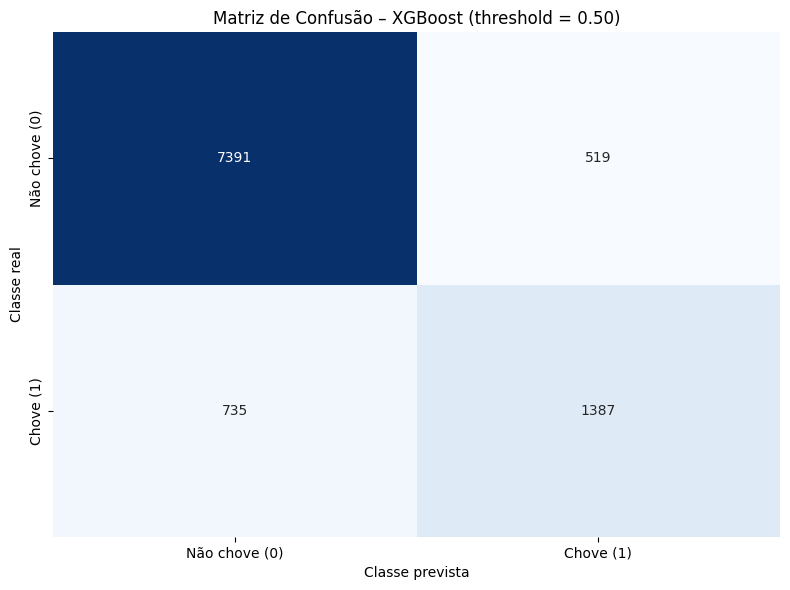

In [295]:
# Correção da sintaxe e ajuste de proporção
plt.figure(figsize=(8, 6)) 

sns.heatmap(
    cm,
    annot=True,
    fmt="d",      
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – XGBoost (threshold = {best_thr_xgb:.2f})")

plt.tight_layout()
plt.show()

In [296]:
"""
smote = SMOTE(
    sampling_strategy=0.4,
    random_state=42,
    k_neighbors=5
)
"""


'\nsmote = SMOTE(\n    sampling_strategy=0.4,\n    random_state=42,\n    k_neighbors=5\n)\n'

In [297]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model)
])


In [298]:
"""
xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]
"""

'\nxgb_smote_pipe.fit(X_train, y_train)\n\ny_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]\n'

In [299]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [300]:

# SCALE_POS_WEIGHT DO TREINOO


n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())

scale_pos_weight = n_neg / n_pos

print("Positivos (chuva):", n_pos)
print("Negativos (não chuva):", n_neg)
print("scale_pos_weight:", scale_pos_weight)


Positivos (chuva): 8599
Negativos (não chuva): 31528
scale_pos_weight: 3.6664728456797304


In [301]:

#  XGBOOST + SMOTE

# sampling

smote = SMOTE(
    sampling_strategy=0.8,
    k_neighbors=5,
    random_state=42
)


#spw = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model_smote = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.03,
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    #eval_metric="logloss",
    eval_metric="aucpr",
    scale_pos_weight=scale_pos_weight,
    #scale_pos_weight=spw,
    random_state=42,
    reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
    n_jobs=-1
)


xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model_smote)
])

xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (smote):", y_proba_xgb_smote[:10])


Exemplo de probas (smote): [0.00272624 0.04586696 0.14738189 0.6577574  0.3330834  0.452715
 0.18524326 0.79557467 0.01806514 0.02315953]


In [312]:

# VARREDURA DE THRESHOLDS


def sweep_thresholds(y_true, y_proba, thresholds):

    results = []
    
    for thr in thresholds:
        y_pred = (y_proba >= thr).astype(int)
        
        acc = accuracy_score(y_true, y_pred)
        rec1 = recall_score(y_true, y_pred, pos_label=1)
        prec1 = precision_score(y_true, y_pred, pos_label=1)
        f11 = f1_score(y_true, y_pred, pos_label=1)
        
        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        results.append({
            "threshold": float(thr),
            "accuracy": acc,
            "recall_chuva": rec1,
            "precision_chuva": prec1,
            "f1_chuva": f11,
            "false_negatives": int(FN),
            "false_positives": int(FP),
            "true_positives" : int(TP),
            "true_negatives" : int(TN)
        })
    
    return pd.DataFrame(results)


In [311]:

# XGBOOST PURO 


xgb_model_control = XGBClassifier(
    n_estimators=500,
    max_depth=10, #5
    learning_rate=0.5, #0.3
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="aucpr", #logloss
    #scale_pos_weight=scale_pos_weight,
    random_state=42,
    reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
    n_jobs=-1
)

xgb_control_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model_control)
])

xgb_control_pipe.fit(X_train, y_train)

y_proba_xgb_control = xgb_control_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (controle):", y_proba_xgb_control[:10])


Exemplo de probas (controle): [2.2947415e-06 2.8441273e-04 4.2850061e-04 1.5552516e-02 2.5891541e-02
 5.9715692e-02 1.5607525e-03 8.3586383e-01 1.6220725e-06 3.0152253e-06]


In [313]:
# RODAR SWEEP COMPARAÇÃO
df_thr_control = sweep_thresholds(y_test, y_proba_xgb_control, thresholds)
df_thr_smote   = sweep_thresholds(y_test, y_proba_xgb_smote, thresholds)

print("Controle XGB")
display(df_thr_control.sort_values("recall_chuva", ascending=False))

print("Experimental XGB e SMOTE")
display(df_thr_smote.sort_values("recall_chuva", ascending=False))


Controle XGB


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.868122,0.675778,0.693088,0.684324,688,635,1434,7275
1,0.35,0.869617,0.658341,0.705556,0.681131,725,583,1397,7327
2,0.40,0.870016,0.642790,0.714136,0.676587,758,546,1364,7364
3,0.45,0.871910,0.631951,0.726829,0.676078,781,504,1341,7406
4,0.50,0.872508,0.619698,0.735870,0.672806,807,472,1315,7438
5,0.55,0.872109,0.608388,0.740677,0.668047,831,452,1291,7458
6,0.60,0.872109,0.593308,0.749851,0.662457,863,420,1259,7490
7,0.65,0.873505,0.582941,0.763109,0.660967,885,384,1237,7526
8,0.70,0.872408,0.565975,0.769872,0.652363,921,359,1201,7551


Experimental XGB e SMOTE


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.779306,0.885485,0.488052,0.629270,243,1971,1879,5939
1,0.35,0.799043,0.868049,0.514813,0.646316,280,1736,1842,6174
2,0.40,0.817982,0.848256,0.544794,0.663472,322,1504,1800,6406
3,0.45,0.833931,0.824694,0.574901,0.677507,372,1294,1750,6616
4,0.50,0.843900,0.794062,0.598792,0.682739,437,1129,1685,6781
5,0.55,0.853967,0.762959,0.627276,0.688497,503,962,1619,6948
6,0.60,0.861244,0.731857,0.653620,0.690529,569,823,1553,7087
7,0.65,0.868820,0.697926,0.686920,0.692380,641,675,1481,7235
8,0.70,0.872508,0.650330,0.719875,0.683337,742,537,1380,7373



Classification report (XGBoost + SMOTE (sampling_strategy=1), thr=0.6):
              precision    recall  f1-score   support

           0     0.9257    0.8960    0.9106      7910
           1     0.6536    0.7319    0.6905      2122

    accuracy                         0.8612     10032
   macro avg     0.7896    0.8139    0.8006     10032
weighted avg     0.8681    0.8612    0.8640     10032

Matriz de confusão:
[[7087  823]
 [ 569 1553]]


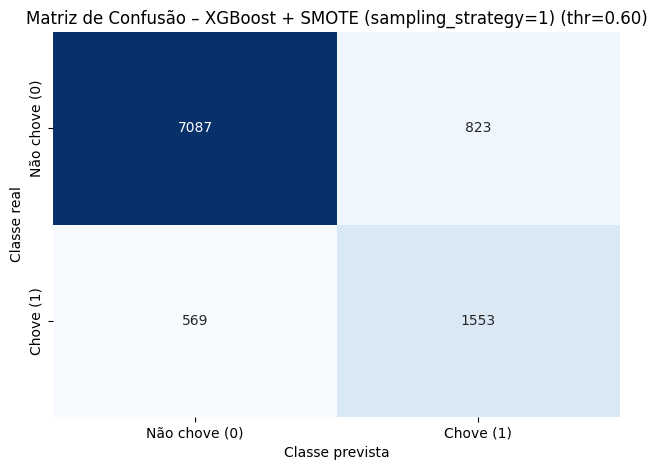

In [314]:

# MATRIZ 

y_proba_final = y_proba_xgb_smote
modelo_nome = "XGBoost + SMOTE (sampling_strategy=1)"

# threshold
best_thr = 0.60

y_pred_final = (y_proba_final >= best_thr).astype(int)

print(f"\nClassification report ({modelo_nome}, thr={best_thr}):")
print(classification_report(y_test, y_pred_final, digits=4))

cm = confusion_matrix(y_test, y_pred_final)
print("Matriz de confusão:")
print(cm)

# Plot
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


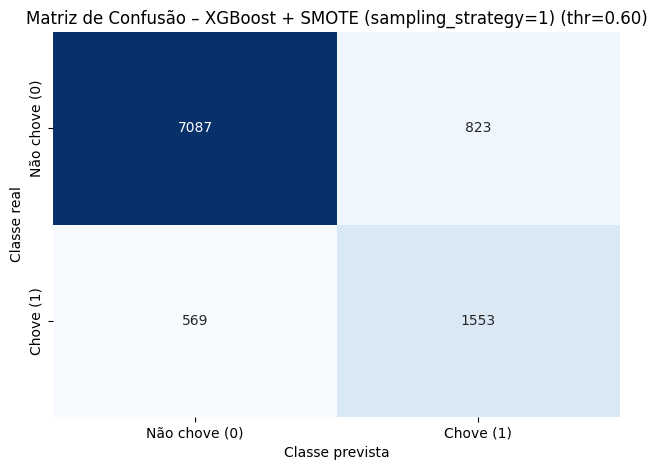

In [315]:

# MATRIZ NORMALIZADA


cm_norm = cm / cm.sum(axis=1, keepdims=True)

"""
plt.figure(figsize=(7,)
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)
plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz Normalizada – {modelo_nome} (thr={best_thr})")
plt.tight_layout()
plt.show()
"""

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


In [307]:
df.columns

Index(['data', 'localidade', 'temp_min', 'temp_max', 'chuva_mm', 'evaporacao',
       'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_direcao',
       'vento_rajada_velocidade', 'vento_direcao_9h_graus', 'vento_direcao_9h',
       'vento_direcao_15h_graus', 'vento_direcao_15h', 'vento_veloc_9h',
       'vento_veloc_15h', 'umidade_9h', 'umidade_15h', 'pressao_9h',
       'pressao_15h', 'nuvem_9h', 'nuvem_15h', 'temp_9h', 'temp_15h',
       'chove_amanha_vtr', 'ano', 'mes', 'dia', 'trimestre_quarter',
       'horas_sol_isna', 'evaporacao_isna', 'nuvem_9h_isna', 'nuvem_15h_isna',
       'pressao_9h_isna', 'pressao_15h_isna', 'choveu_hoje',
       'amplitude_termica', 'umidade_media', 'variacao_pressao', 'latitude',
       'longitude', 'indice_total_enso', 'anomalia_enso', 'evento_enso_num',
       'evento_enso', 'mes_sin', 'mes_cos', 'emissoes_co2', 'estacao_num',
       'estacao', 'altitude', 'distancia_costa', 'ponto_orvalho_15h',
       'depressao_orvalho_15h'],
      dtype='o

In [308]:
# X_all 
#X_all = df.drop(columns=[chove_amanha_vtr]).copy()

# remove data
#X_all = X_all.drop(columns=[data], errors="ignore")


In [316]:

#EXPORT do BI
# pasta
BASE_DIR = r"C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados"
#r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\


# para versionamento de arquivos se utilizar
MODEL_TAG = "xgb_smote_0p4_thr055_v1"

# threshold final escolhido
BEST_THR = 0.60

# nomes das colunas no seu dataset
COL_DATA = "data"
COL_LOCALIDADE = "localidade"
COL_TARGET = "chove_amanha_vtr"

# grade de thresholds para auditoria
thresholds = np.arange(0.30, 0.71, 0.05)

# metadados
VERSAO_DATASET = "australia_clima_v9"
MODELO_NOME = "xgb_smote_0p4"



import os
os.makedirs(BASE_DIR, exist_ok=True)

print("Pasta de saída ok ")
print(BASE_DIR)
print("pasta no loc ", os.path.isdir(BASE_DIR))


# checaando colunas essenciais no df
colunas_essenciais = {COL_DATA, COL_LOCALIDADE, COL_TARGET}
faltando_df = colunas_essenciais - set(df.columns)
if faltando_df:
    raise ValueError(
        f"Seu df não tem as colunas essenciais: {faltando_df}. "
        f"Ajuste COL_DATA/COL_LOCALIDADE/COL_TARGET para o nome correto."
    )

# check se o pipeline existe
if "xgb_smote_pipe" not in globals():
    raise ValueError("A variável xgb_smote_pipe não existe. Treine o pipeline antes de exportar.")

# check se X_test e y_test existem
if "X_test" not in globals() or "y_test" not in globals():
    raise ValueError("X_test e/ou y_test não existem. Você precisa do split de teste para auditoria e tabelas.")



# faixa de risco bi
def faixa_risco(prob):
    """
    converte probabilidade em categoria de texto para facilitar leitura no bi
    """
    if prob < 0.30:
        return "Baixo"
    elif prob < BEST_THR:
        return "Médio"
    elif prob < 0.70:
        return "Alto"
    else:
        return "Crítico"



# varredura dos thresholds
def sweep_thresholds(y_true, y_proba, thresholds_array):
    """
    Para cada threshold:
    - converte probabilidade em classe (0/1)
    - calcula métricas
    - extrai TN/FP/FN/TP

    Retorna DataFrame com resultados por threshold.
    """
    rows = []

    for thr in thresholds_array:
        y_pred = (y_proba >= thr).astype(int)

        acc = accuracy_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred, pos_label=1)
        prec = precision_score(y_true, y_pred, pos_label=1)
        f1 = f1_score(y_true, y_pred, pos_label=1)

        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()

        rows.append({
            "threshold": float(thr),
            "accuracy": float(acc),
            "recall_chuva": float(rec),
            "precision_chuva": float(prec),
            "f1_chuva": float(f1),
            "TN": int(TN),
            "FP": int(FP),
            "FN": int(FN),
            "TP": int(TP),
        })

    return pd.DataFrame(rows)



# MONTAR X_all CORRETAMENTE (evita 'localidade' missing)


# X_all = tudo menos o target (e removemos a data se ela não for feature)
X_all = df.drop(columns=[COL_TARGET]).copy()
X_all = X_all.drop(columns=[COL_DATA], errors="ignore")

if COL_LOCALIDADE not in X_all.columns:
    raise ValueError(
        f"A coluna '{COL_LOCALIDADE}' não está em X_all. "
        f"Seu pipeline provavelmente espera essa coluna. "
        f"Verifique se COL_LOCALIDADE está correto e se você não removeu a coluna por engano."
    )

print("X_all pronto para inferência.")
print("Total de colunas:", len(X_all.columns))
print("Exemplo de colunas (primeiras 10):", list(X_all.columns)[:10])



# GERAR PREVISÕES PARA O DATASET INTEIRO COMPLETO FULL
proba_all = xgb_smote_pipe.predict_proba(X_all)[:, 1]
df_full = pd.DataFrame({
    COL_DATA: pd.to_datetime(df[COL_DATA]).dt.date,
    COL_LOCALIDADE: df[COL_LOCALIDADE],
    "y_real": df[COL_TARGET],
    "prob_chuva": proba_all,
    "pred_chuva": (proba_all >= BEST_THR).astype(int),
    "threshold_usado": BEST_THR,
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
})

df_full["faixa_risco"] = df_full["prob_chuva"].apply(faixa_risco)



# marcar test train
df_full["split"] = "train"
df_full.loc[X_test.index, "split"] = "test"

df_test = df_full.loc[X_test.index].copy()

df_test["flag_TP"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_TN"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 0)).astype(int)
df_test["flag_FP"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_FN"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 0)).astype(int)




# probabilidades no teste 
y_proba_test = xgb_smote_pipe.predict_proba(X_test)[:, 1]

df_thresholds = sweep_thresholds(y_test, y_proba_test, thresholds)
df_thresholds["modelo"] = MODELO_NOME
df_thresholds["model_tag"] = MODEL_TAG
df_thresholds["versao_dataset"] = VERSAO_DATASET



#  resumo final
y_pred_best = (y_proba_test >= BEST_THR).astype(int)

cm_best = confusion_matrix(y_test, y_pred_best)
TN, FP, FN, TP = cm_best.ravel()

acc_best = accuracy_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best, pos_label=1)
prec_best = precision_score(y_test, y_pred_best, pos_label=1)
f1_best = f1_score(y_test, y_pred_best, pos_label=1)

df_confusao_resumo = pd.DataFrame([{
    "threshold": float(BEST_THR),
    "TN": int(TN),
    "FP": int(FP),
    "FN": int(FN),
    "TP": int(TP),
    "accuracy": float(acc_best),
    "recall_chuva": float(rec_best),
    "precision_chuva": float(prec_best),
    "f1_chuva": float(f1_best),
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
}])




# salvando
path_full = fr"{BASE_DIR}\ml_previsoes_full_{MODEL_TAG}.csv"
path_test = fr"{BASE_DIR}\ml_previsoes_test_{MODEL_TAG}.csv"
path_thr  = fr"{BASE_DIR}\ml_thresholds_{MODEL_TAG}.csv"
path_cm   = fr"{BASE_DIR}\ml_confusao_resumo_{MODEL_TAG}.csv"

df_full.to_csv(path_full, sep=";", index=False, encoding="utf-8-sig")
df_test.to_csv(path_test, sep=";", index=False, encoding="utf-8-sig")
df_thresholds.to_csv(path_thr, sep=";", index=False, encoding="utf-8-sig")
df_confusao_resumo.to_csv(path_cm, sep=";", index=False, encoding="utf-8-sig")

print("\nArquivos gerados com sucesso:")
print(path_full)
print(path_test)
print(path_thr)
print(path_cm)


Pasta de saída ok 
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados
pasta no loc  True
X_all pronto para inferência.
Total de colunas: 52
Exemplo de colunas (primeiras 10): ['localidade', 'temp_min', 'temp_max', 'chuva_mm', 'evaporacao', 'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_direcao', 'vento_rajada_velocidade', 'vento_direcao_9h_graus']

Arquivos gerados com sucesso:
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_previsoes_full_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_previsoes_test_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_thresholds_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_confusao_resumo_xgb_smote_0p4_thr055_v1.csv


In [310]:
import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# identificando colunas dinamicamente para evitar erros de tipo
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ("num", ImbPipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),
    ("cat", ImbPipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features)
])


# ADASYN
adasyn_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', ADASYN(sampling_strategy=0.4, random_state=42, n_neighbors=5)),
    ('classifier', xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
])

# treinamento
adasyn_pipeline.fit(X_train, y_train)


y_proba = adasyn_pipeline.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.3, 0.71, 0.05)
resultados = []

for thr in thresholds:
    y_pred = (y_proba >= thr).astype(int)
    
    # métricas Base
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # matriz de Confusão
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    resultados.append({
        "Threshold": f"{thr:.2f}",
        "Accuracy": f"{acc:.4f}",
        "Recall": f"{rec:.4f}",
        "Precision": f"{prec:.4f}",
        "F1-Score": f"{f1:.4f}",
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })


df_audit = pd.DataFrame(resultados)
print(df_audit.to_string(index=False))

Threshold Accuracy Recall Precision F1-Score   TN   FP   FN   TP
     0.30   0.8360 0.7908    0.5828   0.6711 6709 1201  444 1678
     0.35   0.8515 0.7507    0.6237   0.6814 6949  961  529 1593
     0.40   0.8621 0.7074    0.6633   0.6846 7148  762  621 1501
     0.45   0.8674 0.6593    0.6974   0.6778 7303  607  723 1399
     0.50   0.8738 0.6225    0.7396   0.6760 7445  465  801 1321
     0.55   0.8740 0.5697    0.7750   0.6567 7559  351  913 1209
     0.60   0.8724 0.5165    0.8119   0.6313 7656  254 1026 1096
     0.65   0.8687 0.4661    0.8431   0.6003 7726  184 1133  989
     0.70   0.8624 0.4086    0.8740   0.5568 7785  125 1255  867
